In [1]:
import json
import os
import csv
import collections
import numpy as np
import pandas as pd

import shutil
import time
from scipy.stats import zscore
from scipy import stats
from sklearn import preprocessing
from sklearn import utils
import sklearn.feature_extraction.text as sk_text
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

import io
import requests
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, r2_score, roc_curve, auc
from sklearn.linear_model import LinearRegression

In [0]:
from google.colab import files
uploaded = files.upload()


Saving vezni.csv to vezni (1).csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving kraj-vezni1.csv to kraj-vezni1.csv


In [2]:
dataset1=pd.read_csv('data/kraj-vezni1.csv')

In [3]:
dataset=pd.read_csv('data/vezni.csv')

In [4]:
dataset1.describe()

,Overall,LS,ST,RS,LW,LF,CF,RF,RW,LAM,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,...,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,66.748895,60.344624,60.344624,60.344624,63.020619,62.561856,62.561856,62.561856,63.020619,63.476436,...,54.875552,62.248895,51.014728,52.187776,49.201031,10.689985,10.536082,10.592784,10.511046,10.458763
std,6.935930,7.168604,7.168604,7.168604,7.328759,7.315317,7.315317,7.315317,7.328759,7.217882,...,10.685770,9.871162,15.450678,16.448914,16.304538,3.206074,3.159915,3.194714,3.163598,3.136209
min,47.000000,38.000000,38.000000,38.000000,37.000000,37.000000,37.000000,37.000000,37.000000,38.000000,...,12.000000,31.000000,10.000000,12.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,62.000000,55.000000,55.000000,55.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,...,47.000000,56.000000,40.000000,39.000000,36.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,67.000000,60.000000,60.000000,60.000000,63.000000,62.000000,62.000000,62.000000,63.000000,63.000000,...,55.000000,63.000000,53.000000,55.000000,52.000000,11.000000,10.000000,11.000000,10.000000,10.000000
75%,71.000000,65.000000,65.000000,65.000000,68.000000,67.000000,67.000000,67.000000,68.000000,68.000000,...,62.000000,69.000000,63.000000,65.000000,62.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,91.000000,82.000000,82.000000,82.000000,87.000000,87.000000,87.000000,87.000000,87.000000,88.000000,...,91.000000,88.000000,85.000000,86.000000,84.000000,37.000000,32.000000,36.000000,27.000000,30.000000


In [5]:
FIRST_ATTRIBUTE = "LS"
SECOND_ATTRIBUTE = "ST"
treci="RS"
cetvrti="LW"
peti="LF"
sest="CF"
sedam="RF"
osam="RW"
devet="LAM"
deset="CAM"
jed="RAM"
dva="LM"
tri="CM"
cet="RCM"
pet="RM"
ses="LWB"
sed="LDM"
osa="CDM"
dev="RDM"
dvades="RWB"
djed="LB"
ddva="LCB"
dtri="CB"
dcet="RCB"
dpet="RB"
dses="LCM"
dsed="Crossing"
dosa="Finishing"
ddev="HeadingAccuracy"
trides="ShortPassing"
trijed="Volleys"
tridva="Dribbling"
tritri="Curve"
tricet="FKAccuracy"
tripet="LongPassing"
trises="BallControl"
trised="Acceleration"
triosa="SprintSpeed"
tridev="Agility"
cetdes="Reactions"
cetjed="Balance"
cetdva="ShotPower"
cettri="Jumping"
cetcet="Stamina"
cetpet="Strength"
cetses="LongShots"   
cetsed="Aggression"
cetosa="Interceptions"
cetdev="Positioning"
petdes="Vision"
petjed="Penalties"
petdva="Composure"
pettri="Marking"
petcet="StandingTackle"
petpet="SlidingTackle"
petses="Potential"

In [6]:
X_train = dataset[[FIRST_ATTRIBUTE, SECOND_ATTRIBUTE, treci,cetvrti,peti,peti,sest,sedam,osam,devet,deset,jed,dva,tri,cet,pet,ses,sed,osa,dev,dvades,djed,ddva,dtri,dcet,dpet,dses,dsed,dosa,ddev,trides,trijed,tridva,tritri,tricet,tripet,trises,trised,triosa,tridev,cetdes,cetjed,cetdva,cettri,cetcet,cetpet,cetses,cetsed,cetosa,cetdev,petdes,petjed,petdva,pettri,petcet,petpet]].values

In [7]:
y_train = dataset['Overall'].values

In [8]:
X_test=dataset1[[FIRST_ATTRIBUTE, SECOND_ATTRIBUTE, treci,cetvrti,peti,peti,sest,sedam,osam,devet,deset,jed,dva,tri,cet,pet,ses,sed,osa,dev,dvades,djed,ddva,dtri,dcet,dpet,dses,dsed,dosa,ddev,trides,trijed,tridva,tritri,tricet,tripet,trises,trised,triosa,tridev,cetdes,cetjed,cetdva,cettri,cetcet,cetpet,cetses,cetsed,cetosa,cetdev,petdes,petjed,petdva,pettri,petcet,petpet]].values
y_test=dataset1['Overall'].values

In [9]:
y_test

array([91, 90, 87, ..., 48, 48, 47])

In [10]:
regressor = LinearRegression()  
model=regressor.fit(X_train, y_train)

In [11]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
from sklearn.linear_model import Lasso, Ridge
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

In [13]:
df

,Actual,Predicted
0,91,90.174023
1,90,86.229620
2,87,86.534201
3,86,86.243304
4,86,83.814685
5,85,83.872483
6,85,86.003045
7,85,83.881777
8,84,84.858512
9,84,83.269996


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4381195501765982
Mean Squared Error: 3.497842347881821
Root Mean Squared Error: 1.8702519477016515


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


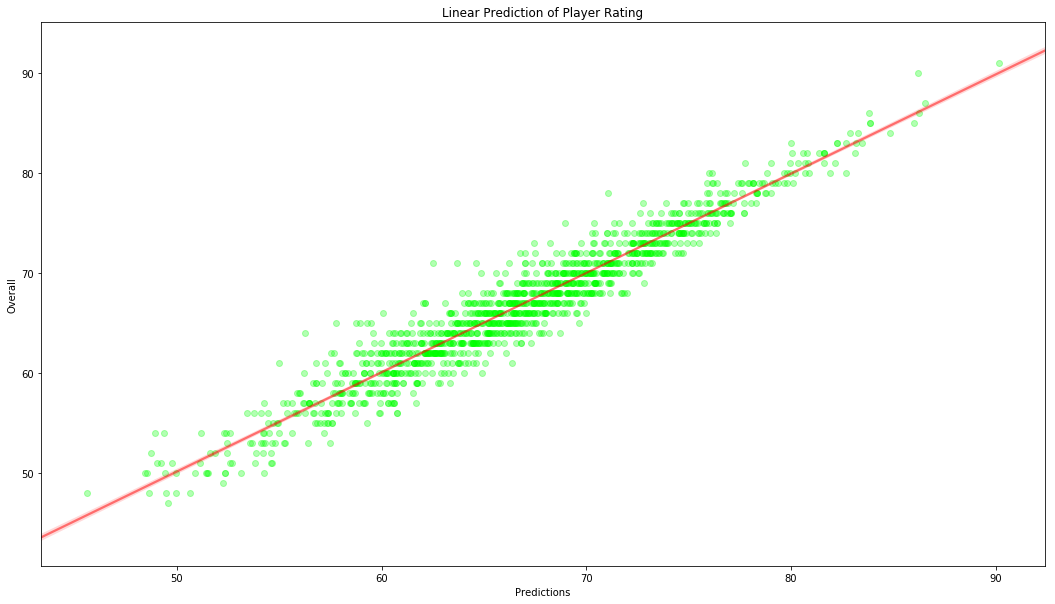

In [16]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(y_pred,y_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

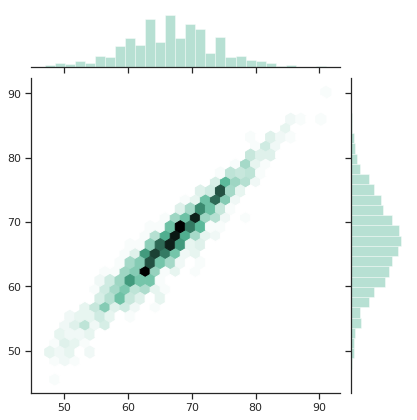

In [0]:
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = y_test
y = y_pred


sns.jointplot(x, y, kind="hex", color="#4CB391")


In [0]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import  linear_model
r2_score(y_test, y_pred)

0.9271882320487523

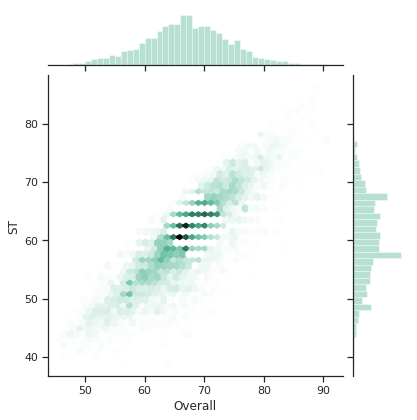

In [18]:
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = dataset['Overall']
y = dataset['ST']


sns.jointplot(x, y, kind="hex", color="#4CB391")


In [0]:
dataset.corr()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
LS,1.000000,1.000000,1.000000,0.940114,0.970321,0.970321,0.970321,0.940114,0.935035,0.935035,0.935035,0.932922,0.802152,0.802152,0.802152,0.932922,0.515188,0.392754,0.392754,0.392754,0.515188,0.416277,0.246708,0.246708,0.246708,0.416277,0.722626,0.845154,0.423893,0.655492,0.759405,0.819236,0.686295,0.594509,0.518333,0.838486,0.329897,0.322269,0.386300,0.742257,0.132214,0.804033,0.190321,0.404540,0.306586,0.825759,0.222760,0.140327,0.859577,0.740449,0.638779,0.723526,0.094986,0.054606,-0.008638,0.037579,0.046815,0.072794,0.039159,0.055946,0.866472
ST,1.000000,1.000000,1.000000,0.940114,0.970321,0.970321,0.970321,0.940114,0.935035,0.935035,0.935035,0.932922,0.802152,0.802152,0.802152,0.932922,0.515188,0.392754,0.392754,0.392754,0.515188,0.416277,0.246708,0.246708,0.246708,0.416277,0.722626,0.845154,0.423893,0.655492,0.759405,0.819236,0.686295,0.594509,0.518333,0.838486,0.329897,0.322269,0.386300,0.742257,0.132214,0.804033,0.190321,0.404540,0.306586,0.825759,0.222760,0.140327,0.859577,0.740449,0.638779,0.723526,0.094986,0.054606,-0.008638,0.037579,0.046815,0.072794,0.039159,0.055946,0.866472
RS,1.000000,1.000000,1.000000,0.940114,0.970321,0.970321,0.970321,0.940114,0.935035,0.935035,0.935035,0.932922,0.802152,0.802152,0.802152,0.932922,0.515188,0.392754,0.392754,0.392754,0.515188,0.416277,0.246708,0.246708,0.246708,0.416277,0.722626,0.845154,0.423893,0.655492,0.759405,0.819236,0.686295,0.594509,0.518333,0.838486,0.329897,0.322269,0.386300,0.742257,0.132214,0.804033,0.190321,0.404540,0.306586,0.825759,0.222760,0.140327,0.859577,0.740449,0.638779,0.723526,0.094986,0.054606,-0.008638,0.037579,0.046815,0.072794,0.039159,0.055946,0.866472
LW,0.940114,0.940114,0.940114,1.000000,0.986038,0.986038,0.986038,1.000000,0.972973,0.972973,0.972973,0.986797,0.785467,0.785467,0.785467,0.986797,0.466379,0.303631,0.303631,0.303631,0.466379,0.342726,0.110553,0.110553,0.110553,0.342726,0.807991,0.820059,0.184520,0.660645,0.737499,0.917644,0.740303,0.617342,0.506996,0.883421,0.471455,0.426918,0.558492,0.697602,0.312023,0.688916,0.128756,0.348120,0.093059,0.778375,0.094000,0.043462,0.847173,0.779071,0.614150,0.705707,0.005682,-0.041773,-0.099686,0.025723,0.042489,0.060713,0.022139,0.041755,0.860959
LF,0.970321,0.970321,0.970321,0.986038,1.000000,1.000000,1.000000,0.986038,0.985082,0.985082,0.985082,0.980456,0.832250,0.832250,0.832250,0.980456,0.509319,0.373627,0.373627,0.373627,0.509319,0.394938,0.188171,0.188171,0.188171,0.394938,0.755832,0.821681,0.274224,0.704151,0.744828,0.894609,0.726318,0.622811,0.554996,0.897402,0.384074,0.349815,0.473250,0.747378,0.241764,0.745410,0.143405,0.371203,0.167217,0.812174,0.162447,0.109509,0.868437,0.809987,0.626424,0.740893,0.064228,0.023198,-0.038783,0.028523,0.040878,0.066001,0.027180,0.046172,0.888844
CF,0.970321,0.970321,0.970321,0.986038,1.000000,1.000000,1.000000,0.986038,0.985082,0.985082,0.985082,0.980456,0.832250,0.832250,0.832250,0.980456,0.509319,0.373627,0.373627,0.373627,0.509319,0.394938,0.188171,0.188171,0.188171,0.394938,0.755832,0.821681,0.274224,0.704151,0.744828,0.894609,0.726318,0.622811,0.554996,0.897402,0.384074,0.349815,0.473250,0.747378,0.241764,0.745410,0.143405,0.371203,0.167217,0.812174,0.162447,0.109509,0.868437,0.809987,0.626424,0.740893,0.064228,0.023198,-0.038783,0.028523,0.040878,0.066001,0.027180,0.046172,0.888844
RF,0.970321,0.970321,0.970321,0.986038,1.000000,1.000000,1.000000,0.986038,0.985082,0.985082,0.985082,0.980456,0.832250,0.832250,0.832250,0.980456,0.509319,0.373627,0.373627,0.373627,0.509319,0.394938,0.188171,0.188171,0.18

In [19]:
feature_cols=[FIRST_ATTRIBUTE, SECOND_ATTRIBUTE, treci,cetvrti,peti,peti,sest,sedam,osam,devet,deset,jed,dva,tri,cet,pet,ses,sed,osa,dev,dvades,djed,ddva,dtri,dcet,dpet,dses,dsed,dosa,ddev,trides,trijed,tridva,tritri,tricet,tripet,trises,trised,triosa,tridev,cetdes,cetjed,cetdva,cettri,cetcet,cetpet,cetses,cetsed,cetosa,cetdev,petdes,petjed,petdva,pettri,petcet,petpet]
list(zip(feature_cols,regressor.coef_))

[('LS', -73314761990.92896),
 ('ST', 23263616417.92235),
 ('RS', 50051145572.94768),
 ('LW', 791509152640.7024),
 ('LF', 39912041727.93808),
 ('LF', -31918458531.146873),
 ('CF', -9361075269.74464),
 ('RF', 1367492072.8235874),
 ('RW', -791509152640.7932),
 ('LAM', 13210967972.485302),
 ('CAM', 4729786713.466721),
 ('RAM', -17940754686.167786),
 ('LM', 1611103441.1744251),
 ('CM', 74041358763.17079),
 ('RCM', -29089238893.28306),
 ('RM', -1611103441.478118),
 ('LWB', -29787772043.48403),
 ('LDM', 52863544774.02038),
 ('CDM', -15233739564.975792),
 ('RDM', -37629805209.24597),
 ('RWB', 29787772043.480186),
 ('LB', 11166817662.528736),
 ('LCB', -26712189133.051888),
 ('CB', 18541216469.322655),
 ('RCB', 8170972663.727529),
 ('RB', -11166817662.459772),
 ('LCM', -44952119869.944565),
 ('Crossing', 0.07965826988220215),
 ('Finishing', 0.09421443939208984),
 ('HeadingAccuracy', 0.03148460388183594),
 ('ShortPassing', 0.2996525764465332),
 ('Volleys', -0.019848227500915527),
 ('Dribbling', 0